<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Game_of_Life_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game of Life

According to Wikipedia's article: "The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970."

The board is made up of an m x n grid of cells, where each cell has an initial state: live (represented by a 1) or dead (represented by a 0). Each cell interacts with its eight neighbors (horizontal, vertical, diagonal) using the following four rules (taken from the above Wikipedia article):

1. Any live cell with fewer than two live neighbors dies as if caused by under-population.
2. Any live cell with two or three live neighbors lives on to the next generation.
3. Any live cell with more than three live neighbors dies, as if by over-population.
4. Any dead cell with exactly three live neighbors becomes a live cell, as if by reproduction.
The next state is created by applying the above rules simultaneously to every cell in the current state, where births and deaths occur simultaneously. Given the current state of the m x n grid board, return the next state.

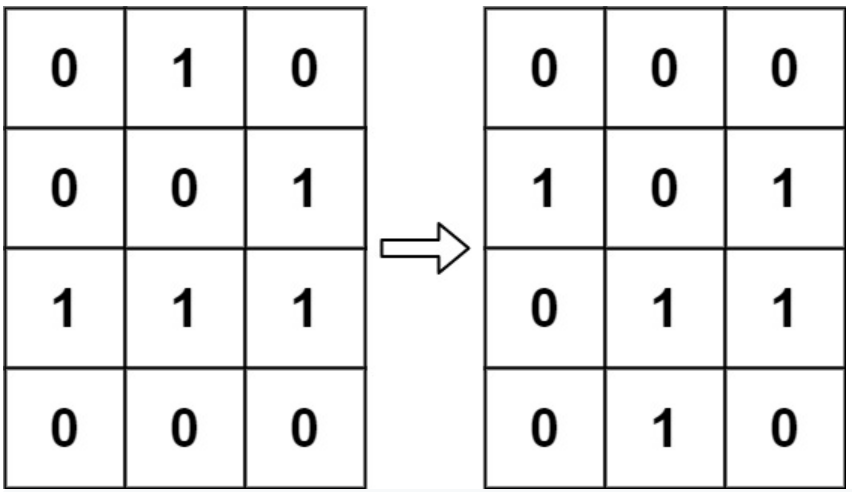

Example 1:

```
Input: board = [[0,1,0],[0,0,1],[1,1,1],[0,0,0]]
Output: [[0,0,0],[1,0,1],[0,1,1],[0,1,0]]
```



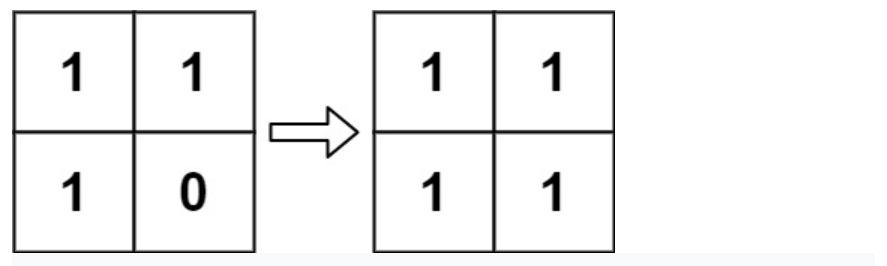

Example 2:

```
Input: board = [[1,1],[1,0]]
Output: [[1,1],[1,1]]
```



Constraints:

```
m == board.length
n == board[i].length
1 <= m, n <= 25
board[i][j] is 0 or 1.
```



Follow up:


- Could you solve it in-place? Remember that the board needs to be updated simultaneously: You cannot update some cells first and then use their updated values to update other cells.
- In this question, we represent the board using a 2D array. In principle, the board is infinite, which would cause problems when the active area encroaches upon the border of the array (i.e., live cells reach the border). How would you address these problems?



# Solution 1: O(mn) space

In [1]:
# Time O(mn)
# Space O(mn)

class Solution:
    def gameOfLife(self, board):
        """
        Do not return anything, modify board in-place instead.
        """

        # Neighbors array to find 8 neighboring cells for a given cell
        neighbors = [(1,0), (1,-1), (0,-1), (-1,-1), (-1,0), (-1,1), (0,1), (1,1)]

        rows = len(board)
        cols = len(board[0])

        # Create a copy of the original board
        copy_board = [[board[row][col] for col in range(cols)] for row in range(rows)]

        for row in range(rows):
            for col in range(cols):

                live_neighbors = 0
                for neighbor in neighbors:

                    r = (row + neighbor[0])
                    c = (col + neighbor[1])

                    if (r < rows and r >= 0) and (c < cols and c >= 0) and (copy_board[r][c] == 1):
                        live_neighbors += 1

                # Rule 1 or Rule 3        
                if copy_board[row][col] == 1 and (live_neighbors < 2 or live_neighbors > 3):
                    board[row][col] = 0
                # Rule 4
                if copy_board[row][col] == 0 and live_neighbors == 3:
                    board[row][col] = 1

In [2]:
board = [[0,1,0],[0,0,1],[1,1,1],[0,0,0]]
expected = [[0,0,0],[1,0,1],[0,1,1],[0,1,0]]

Solution().gameOfLife(board)
output = board
print(output)
assert output == expected

[[0, 0, 0], [1, 0, 1], [0, 1, 1], [0, 1, 0]]


In [3]:
board = [[1,1],[1,0]]
expected = [[1,1],[1,1]]

Solution().gameOfLife(board)
output = board
print(output)
assert output == expected

[[1, 1], [1, 1]]


# Solution 2: O(1) space

- add 2 more states in the same sapce
- -1 = now dead but was live
- 2 = now live but was dead

In [4]:
# Time O(mn)
# Sapce O(1) : not including input

class Solution:
    def gameOfLife(self, board):
        """
        Do not return anything, modify board in-place instead.
        """
        # Neighbors array to find 8 neighboring cells for a given cell
        neighbors = [(1,0), (1,-1), (0,-1), (-1,-1), (-1,0), (-1,1), (0,1), (1,1)]

        rows = len(board)
        cols = len(board[0])

        for row in range(rows):
            for col in range(cols):

                live_neighbors = 0
                for neighbor in neighbors:

                    r = (row + neighbor[0])
                    c = (col + neighbor[1])

                    if (r < rows and r >= 0) and (c < cols and c >= 0) and abs(board[r][c]) == 1:
                        live_neighbors += 1

                # Rule 1 or Rule 3
                if board[row][col] == 1 and (live_neighbors < 2 or live_neighbors > 3):
                    # -1 = now dead, was live.
                    board[row][col] = -1
                # Rule 4
                if board[row][col] == 0 and live_neighbors == 3:
                    # 2 = now live, was dead.
                    board[row][col] = 2

        for row in range(rows):
            for col in range(cols):
                if board[row][col] > 0:
                    board[row][col] = 1
                else:
                    board[row][col] = 0

In [5]:
board = [[0,1,0],[0,0,1],[1,1,1],[0,0,0]]
expected = [[0,0,0],[1,0,1],[0,1,1],[0,1,0]]

Solution().gameOfLife(board)
output = board
print(output)
assert output == expected

[[0, 0, 0], [1, 0, 1], [0, 1, 1], [0, 1, 0]]


In [6]:
board = [[1,1],[1,0]]
expected = [[1,1],[1,1]]

Solution().gameOfLife(board)
output = board
print(output)
assert output == expected

[[1, 1], [1, 1]]
